<a href="https://colab.research.google.com/github/Ghasememami/ML/blob/main/Midterm/ML_midterm_emamimoghaddamipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
!pip install --upgrade --no-cach-dir gdown
! gdown 1eX7Mr1C1LTraVV5ju7hQEkAFBH0-xLJp





Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1eX7Mr1C1LTraVV5ju7hQEkAFBH0-xLJp
From (redirected): https://drive.google.com/uc?id=1eX7Mr1C1LTraVV5ju7hQEkAFBH0-xLJp&confirm=t&uuid=f1c4c62e-94e6-45b7-ab67-f05d66bf6003
To: /content/DATA.mat
100% 2.91M/2.91M [00:00<00:00, 87.3MB/s]


In [ ]:

dataset = sio.loadmat('/content/DATA.mat')
data_NOV9 = pd.DataFrame(dataset['NOV9'])
data_NOV17 = pd.DataFrame(dataset['NOV17'])


In [ ]:
dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jun 26 12:48:29 2020',
 '__version__': '1.0',
 '__globals__': [],
 'NOV17': array([[0.0000e+00, 6.4200e+02, 3.5900e+02, ..., 1.4010e+02, 1.7200e+02,
         1.3360e+02],
        [1.0000e+00, 6.3590e+02, 3.5680e+02, ..., 1.4010e+02, 1.7200e+02,
         1.3360e+02],
        [2.0000e+00, 6.3880e+02, 3.5600e+02, ..., 1.4010e+02, 1.7200e+02,
         1.3360e+02],
        ...,
        [8.6397e+04, 6.6420e+02, 3.7260e+02, ..., 1.4040e+02, 1.7310e+02,
         1.3370e+02],
        [8.6398e+04, 6.7030e+02, 3.6290e+02, ..., 1.4040e+02, 1.7300e+02,
         1.3370e+02],
        [8.6399e+04, 6.6590e+02, 3.6310e+02, ..., 1.4040e+02, 1.7310e+02,
         1.3380e+02]]),
 'NOV9': array([[0.0000e+00, 6.9910e+02, 3.0060e+02, ..., 1.3690e+02, 1.6400e+02,
         1.3210e+02],
        [1.0000e+00, 6.9770e+02, 2.9890e+02, ..., 1.3690e+02, 1.6410e+02,
         1.3210e+02],
        [2.0000e+00, 6.9620e+02, 3.0180e+02, ..., 1.3690e+02,

In [ ]:
data_NOV17 = data_NOV17.iloc[:,1:]
data_NOV17

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,642.0,359.0,97.4,351.3,33.9,33.1,47.6,130.5,134.6,12.0,26.6,67.2,271.6,140.1,172.0,133.6
1,635.9,356.8,97.4,352.6,35.0,32.9,47.0,130.5,134.6,12.0,26.6,67.0,271.4,140.1,172.0,133.6
2,638.8,356.0,97.4,353.4,33.9,34.0,47.4,130.5,134.6,12.0,26.6,65.9,271.5,140.1,172.0,133.6
3,637.6,350.7,97.4,354.1,34.4,33.3,46.8,130.5,134.6,12.0,26.5,66.9,271.1,140.1,171.9,133.6
4,635.7,360.4,97.4,354.3,33.7,33.3,47.4,130.5,134.6,12.0,26.5,67.1,271.3,140.1,171.9,133.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,661.1,383.6,96.0,367.9,34.0,32.9,48.3,130.6,134.5,13.5,21.1,77.2,275.1,140.4,173.0,133.7
86396,669.6,363.4,96.0,366.1,33.8,32.7,48.0,130.6,134.5,13.5,21.1,76.3,274.6,140.4,172.9,133.7
86397,664.2,372.6,96.0,363.0,34.4,32.9,48.5,130.6,134.5,13.5,21.0,75.6,274.6,140.4,173.1,133.7
86398,670.3,362.9,96.0,361.5,33.9,32.9,47.9,130.6,134.5,13.5,21.0,75.4,275.0,140.4,173.0,133.7


In [ ]:
data_NOV9 = data_NOV9.iloc[:,1:]
data_NOV9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       86400 non-null  float64
 1   2       86400 non-null  float64
 2   3       86400 non-null  float64
 3   4       86400 non-null  float64
 4   5       86400 non-null  float64
 5   6       86400 non-null  float64
 6   7       86400 non-null  float64
 7   8       86400 non-null  float64
 8   9       86400 non-null  float64
 9   10      86400 non-null  float64
 10  11      86400 non-null  float64
 11  12      86400 non-null  float64
 12  13      86400 non-null  float64
 13  14      86400 non-null  float64
 14  15      86400 non-null  float64
 15  16      86400 non-null  float64
dtypes: float64(16)
memory usage: 10.5 MB


In [ ]:
data_NOV17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       86400 non-null  float64
 1   2       86400 non-null  float64
 2   3       86400 non-null  float64
 3   4       86400 non-null  float64
 4   5       86400 non-null  float64
 5   6       86400 non-null  float64
 6   7       86400 non-null  float64
 7   8       86400 non-null  float64
 8   9       86400 non-null  float64
 9   10      86400 non-null  float64
 10  11      86400 non-null  float64
 11  12      86400 non-null  float64
 12  13      86400 non-null  float64
 13  14      86400 non-null  float64
 14  15      86400 non-null  float64
 15  16      86400 non-null  float64
dtypes: float64(16)
memory usage: 10.5 MB


In [ ]:
data_NOV9

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,699.1,300.6,97.8,296.2,42.7,42.0,46.1,129.1,133.4,12.2,26.4,53.0,242.0,136.9,164.0,132.1
1,697.7,298.9,97.8,295.4,41.8,41.6,45.3,129.1,133.3,12.2,26.4,51.6,241.4,136.9,164.1,132.1
2,696.2,301.8,97.8,295.4,42.9,41.4,46.6,129.1,133.4,12.2,26.3,50.3,241.6,136.9,164.1,132.1
3,702.8,300.9,97.7,295.1,43.1,41.5,46.0,129.1,133.4,12.2,26.2,50.2,241.6,136.9,164.2,132.1
4,701.3,292.6,97.8,294.6,42.6,42.3,47.0,129.1,133.4,12.2,26.1,51.8,241.3,136.8,163.9,132.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,598.8,373.1,97.0,379.9,31.4,30.0,46.9,128.7,132.3,13.5,26.5,69.9,276.1,140.4,172.0,133.4
86396,601.5,365.6,97.0,378.9,30.7,30.7,46.4,128.7,132.3,13.5,26.5,69.5,276.1,140.4,172.0,133.4
86397,597.8,374.8,97.0,378.5,30.1,30.5,46.4,128.7,132.3,13.5,26.5,70.4,276.2,140.4,172.0,133.4
86398,593.7,379.7,97.0,378.8,30.3,30.3,46.1,128.7,132.3,13.5,26.5,70.5,276.2,140.4,172.0,133.4


In [ ]:
f_16_1 = data_NOV9.loc[57275:57550, :]


f_18_1 = data_NOV9.loc[58830:58930, :]
f_18_2 = data_NOV9.loc[58520:58625, :]

fault_16 =pd.concat([f_16_1])
fault_18 =pd.concat([f_18_1,f_18_2])
total_fault = pd.concat([f_16_1,f_18_1,f_18_2])

pos1 = list(range(57275,57550))
pos2 = list(range(58830,58930))
pos3 = list(range(58520,58625))

fault_pos = pos1 + pos2 + pos3;

In [ ]:
label = []

In [ ]:
for i in range(len(data_NOV9)):
  if (i >= 58520) & (i<=58930):
    label.append(1) #18 erroe
  elif (i >= 58830) & (i<=58930):
    label.append(1) # 18 error
  elif (i >= 57275) & (i<=57550):
    label.append(2) # 16 error
  else:
    label.append(0) # normal

In [ ]:
new_column = pd.Series(label)
data_NOV9.insert(len(data_NOV9.columns), 'Target', new_column)
data_NOV9

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Target
0,699.1,300.6,97.8,296.2,42.7,42.0,46.1,129.1,133.4,12.2,26.4,53.0,242.0,136.9,164.0,132.1,0
1,697.7,298.9,97.8,295.4,41.8,41.6,45.3,129.1,133.3,12.2,26.4,51.6,241.4,136.9,164.1,132.1,0
2,696.2,301.8,97.8,295.4,42.9,41.4,46.6,129.1,133.4,12.2,26.3,50.3,241.6,136.9,164.1,132.1,0
3,702.8,300.9,97.7,295.1,43.1,41.5,46.0,129.1,133.4,12.2,26.2,50.2,241.6,136.9,164.2,132.1,0
4,701.3,292.6,97.8,294.6,42.6,42.3,47.0,129.1,133.4,12.2,26.1,51.8,241.3,136.8,163.9,132.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,598.8,373.1,97.0,379.9,31.4,30.0,46.9,128.7,132.3,13.5,26.5,69.9,276.1,140.4,172.0,133.4,0
86396,601.5,365.6,97.0,378.9,30.7,30.7,46.4,128.7,132.3,13.5,26.5,69.5,276.1,140.4,172.0,133.4,0
86397,597.8,374.8,97.0,378.5,30.1,30.5,46.4,128.7,132.3,13.5,26.5,70.4,276.2,140.4,172.0,133.4,0
86398,593.7,379.7,97.0,378.8,30.3,30.3,46.1,128.7,132.3,13.5,26.5,70.5,276.2,140.4,172.0,133.4,0


In [ ]:
 sample_normal = data_NOV9.loc[0:57274, :]

as it can bee senn number of normal values are much bigger than fault so it is appropriate to consider part of them.

In [ ]:
len(total_fault)

483

In [ ]:
df_fault = total_fault
df_normal = sample_normal

In [ ]:
df_fault

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
57275,649.3,359.5,96.8,362.9,34.8,32.9,46.5,127.8,131.9,13.2,20.5,68.8,272.0,139.9,168.8,133.0
57276,650.1,352.6,96.8,363.0,34.6,33.6,46.7,127.8,131.8,13.2,20.6,65.9,271.8,139.9,168.9,133.0
57277,648.6,361.2,96.9,364.5,34.9,33.5,46.9,127.9,131.8,13.2,20.7,69.1,272.1,139.9,168.7,133.0
57278,646.9,357.8,96.9,365.1,35.3,32.8,46.9,127.8,131.9,13.2,20.9,68.6,272.1,139.9,168.9,133.0
57279,641.3,361.9,96.8,365.9,35.3,33.2,46.9,127.8,131.9,13.2,20.8,67.6,272.1,139.9,168.7,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,699.6,321.1,96.3,325.0,46.6,44.4,52.8,128.0,132.7,13.4,21.0,71.3,273.6,140.1,169.2,132.9
58622,700.9,315.3,96.3,322.5,46.2,44.3,52.5,128.0,132.7,13.4,21.1,70.7,273.4,140.0,169.4,132.9
58623,701.6,307.4,96.3,320.9,45.9,45.3,52.1,128.0,132.8,13.4,21.2,70.9,273.3,140.1,169.4,132.9
58624,697.7,315.5,96.3,320.1,45.3,46.2,51.8,127.9,132.8,13.4,21.3,69.9,273.5,140.1,169.4,132.9


create features of the data

In [ ]:
type(data_NOV9)

pandas.core.frame.DataFrame

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>,
        <Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

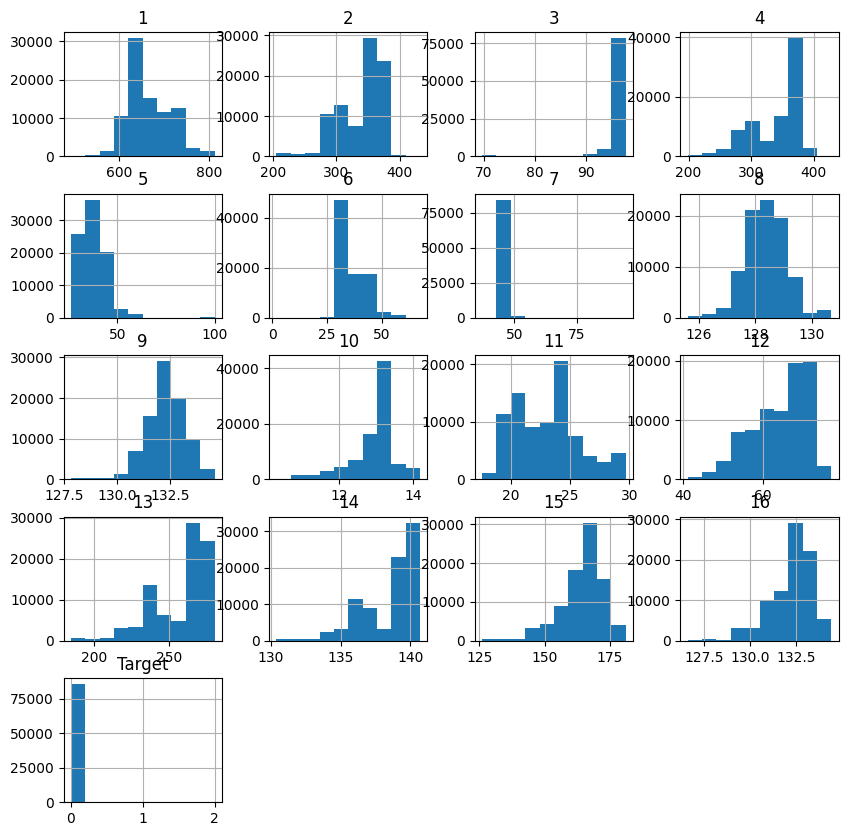

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)
data_NOV9.hist()

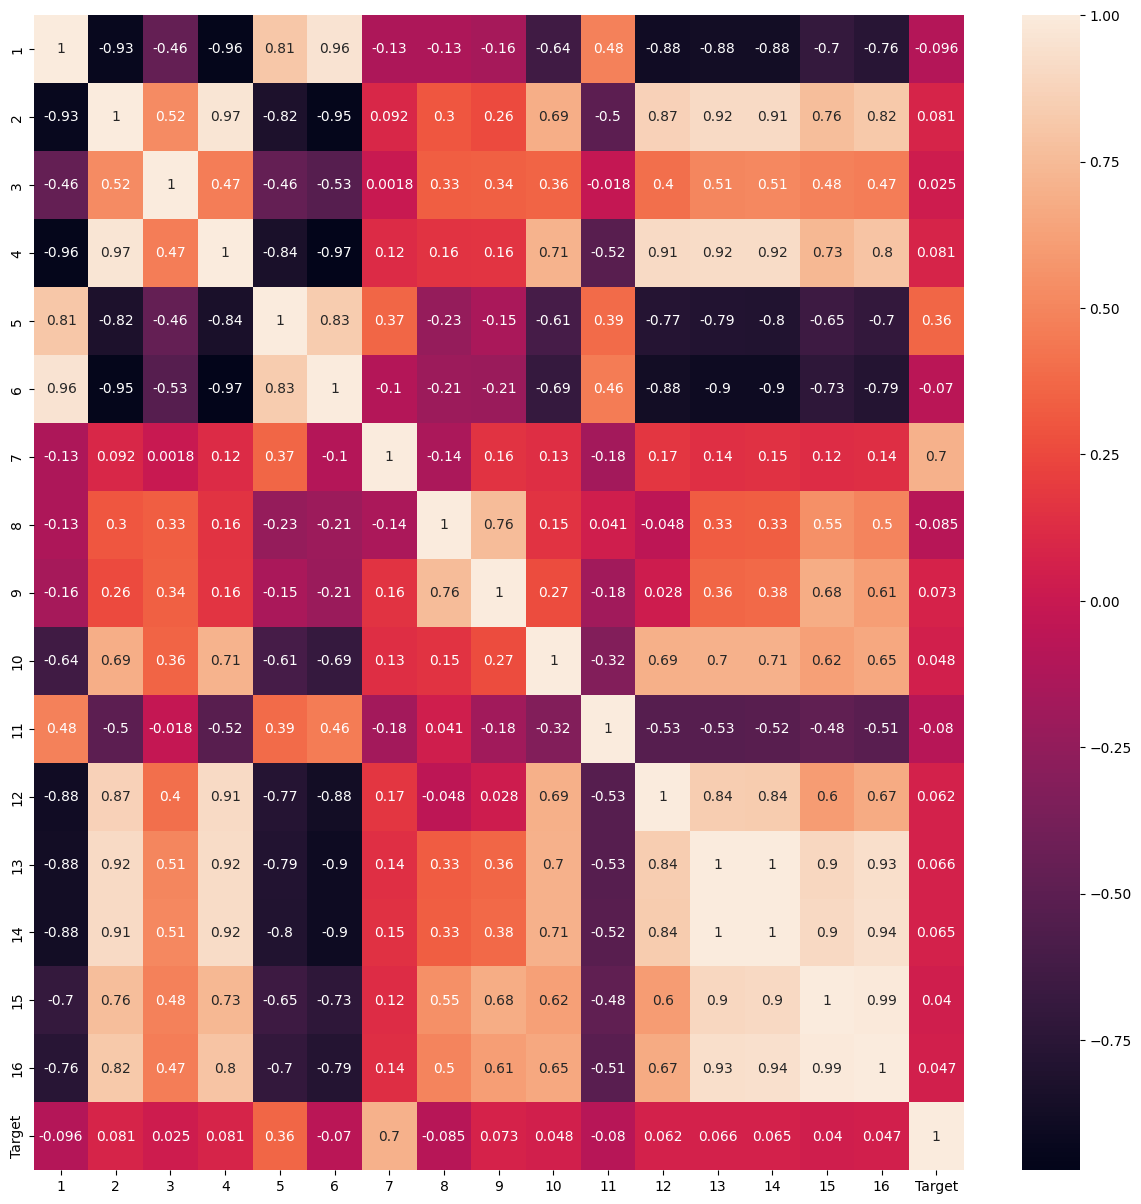

In [ ]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15, 15)
cor=data_NOV9.corr()
fig, ax = plt.subplots()
ax = sns.heatmap(cor, annot=True)
# import pandas as pd
# import matplotlib.pyplot as plt

# correlation_matrix = dataset.corr()
# plt.matshow(correlation_matrix)
# plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
# plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
# plt.colorbar()
# plt.show()

as it can be seen the corrolation of target and column number 7 in higher than others so we choose the column 7 as x.

In [ ]:
X = data_NOV9.iloc[:,7]
Y = data_NOV9['Target']

X = np.array(X)
Y = np.array(Y)

In [ ]:

from sklearn.utils import shuffle


In [ ]:
X_shuffled, Y_shuffled = shuffle(X,Y, random_state = 14)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split( X_shuffled, Y_shuffled, test_size = 0.2,  random_state = 14)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(69120,) (17280,) (69120,) (17280,)


In [ ]:
x_val , x_test , y_val , y_test = train_test_split(x_test, y_test , test_size = 0.5 ,  random_state = 14)
print(x_val.shape, x_test.shape, y_val.shape, y_test.shape)

(8640,) (8640,) (8640,) (8640,)


In [ ]:
x_train.reshape(-1,1).shape

(69120, 1)

In [ ]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
x_val = x_val.reshape(-1,1)

In [ ]:
x_train.shape

(69120, 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)
x_val_norm = scaler.transform(x_val)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sb

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import tensorflow as tf
tf.random.set_seed(14)



model_1 = Sequential([
    Dense(units = 5, activation='relu'),
    Dense(units = 4, activation='relu'),
    Dense(units = 3, activation='softmax'),
])

model_1.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
    )

hist_1 = model_1.fit(
    x=x_train_norm,
    y=y_train,
    validation_data=(x_val_norm,y_val),
    epochs=10,
    batch_size=10,
    verbose=2,
    )

Epoch 1/10
6912/6912 - 18s - loss: 0.0779 - accuracy: 0.9905 - val_loss: 0.0513 - val_accuracy: 0.9918 - 18s/epoch - 3ms/step
Epoch 2/10
6912/6912 - 13s - loss: 0.0497 - accuracy: 0.9920 - val_loss: 0.0510 - val_accuracy: 0.9918 - 13s/epoch - 2ms/step
Epoch 3/10
6912/6912 - 10s - loss: 0.0495 - accuracy: 0.9920 - val_loss: 0.0512 - val_accuracy: 0.9918 - 10s/epoch - 1ms/step
Epoch 4/10
6912/6912 - 15s - loss: 0.0493 - accuracy: 0.9920 - val_loss: 0.0508 - val_accuracy: 0.9918 - 15s/epoch - 2ms/step
Epoch 5/10
6912/6912 - 17s - loss: 0.0492 - accuracy: 0.9920 - val_loss: 0.0510 - val_accuracy: 0.9918 - 17s/epoch - 2ms/step
Epoch 6/10
6912/6912 - 20s - loss: 0.0492 - accuracy: 0.9920 - val_loss: 0.0508 - val_accuracy: 0.9918 - 20s/epoch - 3ms/step
Epoch 7/10
6912/6912 - 20s - loss: 0.0490 - accuracy: 0.9920 - val_loss: 0.0507 - val_accuracy: 0.9918 - 20s/epoch - 3ms/step
Epoch 8/10
6912/6912 - 14s - loss: 0.0490 - accuracy: 0.9920 - val_loss: 0.0507 - val_accuracy: 0.9918 - 14s/epoch - 2

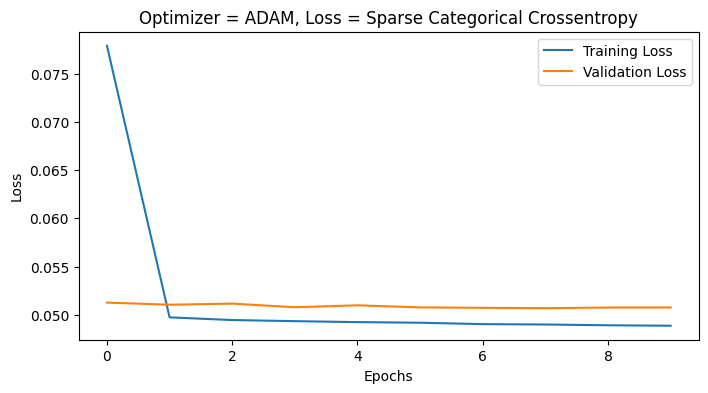

In [ ]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(hist_1.history['loss'])   # Training loss
plt.plot(hist_1.history['val_loss'])  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Optimizer = ADAM, Loss = Sparse Categorical Crossentropy')
plt.show()

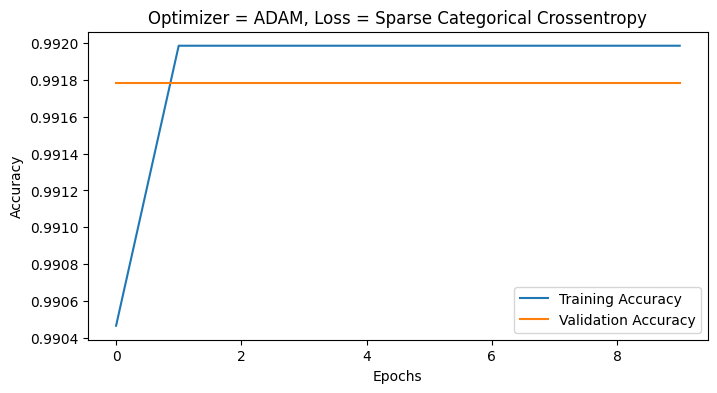

In [ ]:
plt.plot(hist_1.history['accuracy'])   # Training accuracy
plt.plot(hist_1.history['val_accuracy'])  # Validation accuracy

plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Optimizer = ADAM, Loss = Sparse Categorical Crossentropy')
plt.show()

270/270 [==============================] - 3s 8ms/step


Text(70.72222222222221, 0.5, 'True ')

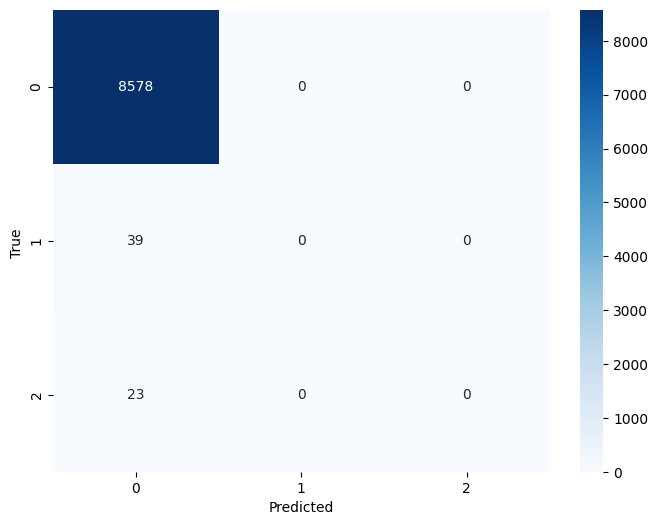

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = model_1.predict(x_test_norm)
y_pred_index =[]
# for i in range(len(y_pred)) :
#   index = np.argmax(y_pred[i])
#   y_pred_index.append([index])

y_pred_index = np.argmax(y_pred , axis = 1 )

cf_matrix = confusion_matrix(y_test,y_pred_index)

plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix , annot=True , fmt = 'd' , cmap = 'Blues' , annot_kws = {'size':10})
plt.xlabel("Predicted")
plt.ylabel("True ")

under sampling code

(666, 1) (666,)


<ipython-input-192-f497dc749864>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_rus, palette='viridis');


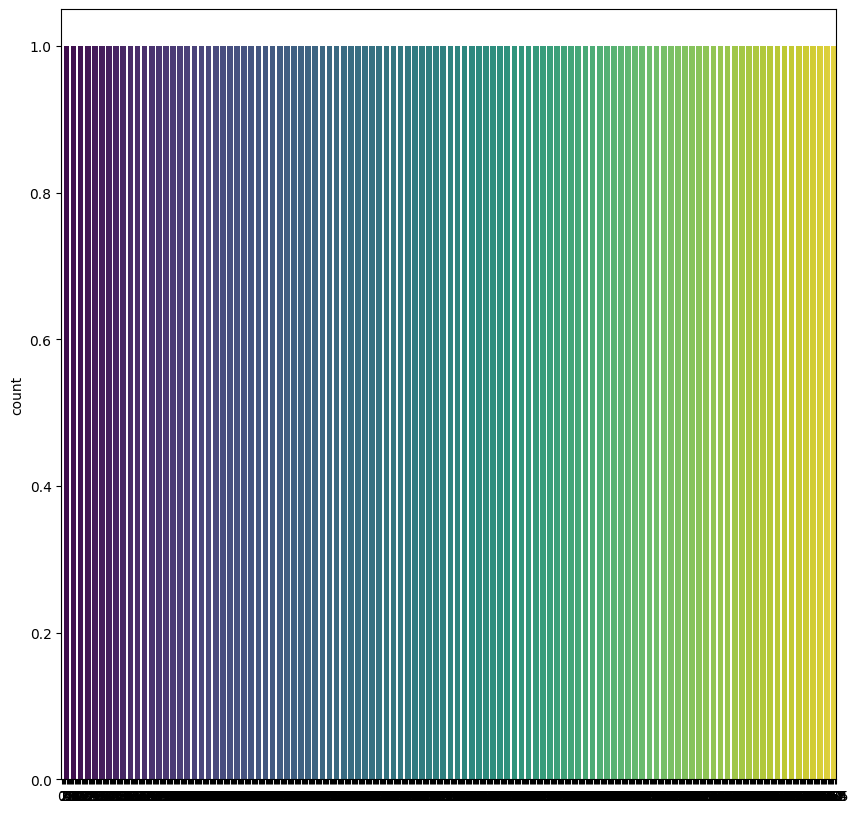

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='all',random_state=14,replacement=False)

X_rus, y_rus = rus.fit_resample(x_train, y_train)
print(X_rus.shape, y_rus.shape)


sns.countplot(data=y_rus, palette='viridis');

In [ ]:
import tensorflow as tf
tf.random.set_seed(14)



model_1 = Sequential([
    Dense(units = 5, activation='relu'),
    Dense(units = 4, activation='relu'),
    Dense(units = 3, activation='softmax'),
])

model_1.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
    )

hist_1 = model_1.fit(
    x=X_rus,
    y=y_rus,
    validation_data=(x_val_norm,y_val),
    epochs=10,
    batch_size=10,
    verbose=2,
    )

Epoch 1/10
67/67 - 6s - loss: 108.9057 - accuracy: 0.3333 - val_loss: 1.2414 - val_accuracy: 0.0094 - 6s/epoch - 83ms/step
Epoch 2/10
67/67 - 1s - loss: 60.1252 - accuracy: 0.3333 - val_loss: 1.0335 - val_accuracy: 0.0214 - 1s/epoch - 15ms/step
Epoch 3/10
67/67 - 1s - loss: 20.2900 - accuracy: 0.3318 - val_loss: 0.8762 - val_accuracy: 0.9740 - 1s/epoch - 21ms/step
Epoch 4/10
67/67 - 1s - loss: 7.6972 - accuracy: 0.3138 - val_loss: 0.7216 - val_accuracy: 0.9918 - 1s/epoch - 16ms/step
Epoch 5/10
67/67 - 1s - loss: 1.2030 - accuracy: 0.3318 - val_loss: 0.6952 - val_accuracy: 0.9918 - 1s/epoch - 21ms/step
Epoch 6/10
67/67 - 1s - loss: 1.1209 - accuracy: 0.3574 - val_loss: 0.6989 - val_accuracy: 0.9918 - 989ms/epoch - 15ms/step
Epoch 7/10
67/67 - 1s - loss: 1.1198 - accuracy: 0.3213 - val_loss: 0.6974 - val_accuracy: 0.9918 - 1s/epoch - 16ms/step
Epoch 8/10
67/67 - 3s - loss: 1.1165 - accuracy: 0.3438 - val_loss: 0.6958 - val_accuracy: 0.9918 - 3s/epoch - 40ms/step
Epoch 9/10
67/67 - 1s - l

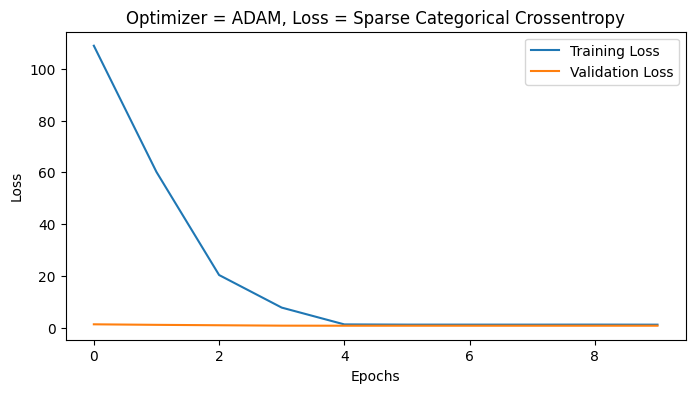

In [ ]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.plot(hist_1.history['loss'])   # Training loss
plt.plot(hist_1.history['val_loss'])  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Optimizer = ADAM, Loss = Sparse Categorical Crossentropy')
plt.show()

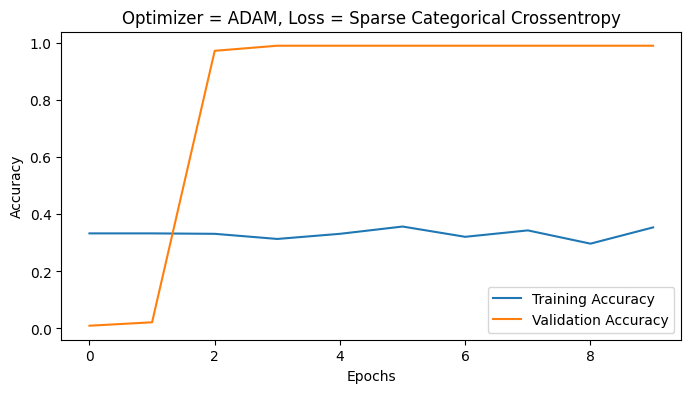

In [ ]:
plt.plot(hist_1.history['accuracy'])   # Training accuracy
plt.plot(hist_1.history['val_accuracy'])  # Validation accuracy

plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Optimizer = ADAM, Loss = Sparse Categorical Crossentropy')
plt.show()

21/21 [==============================] - 0s 4ms/step


Text(70.72222222222221, 0.5, 'True ')

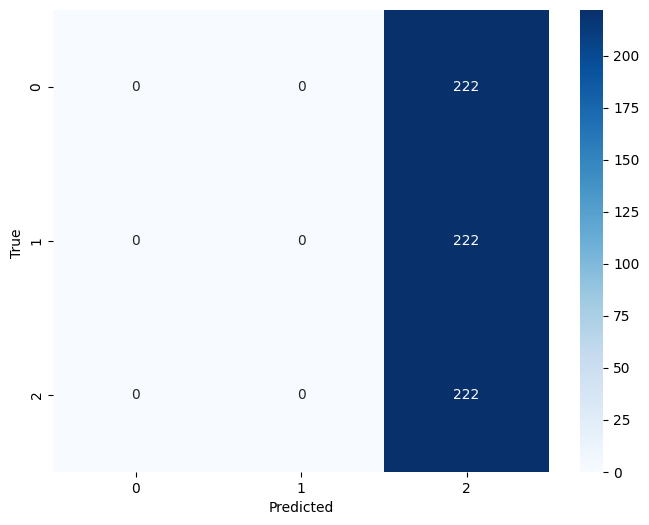

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = model_1.predict(X_rus)
y_pred_index =[]
# for i in range(len(y_pred)) :
#   index = np.argmax(y_pred[i])
#   y_pred_index.append([index])

y_pred_index = np.argmax(y_pred , axis = 1 )

cf_matrix = confusion_matrix(y_rus,y_pred_index)

plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix , annot=True , fmt = 'd' , cmap = 'Blues' , annot_kws = {'size':10})
plt.xlabel("Predicted")
plt.ylabel("True ")

In [ ]:
type(data_NOV9)

pandas.core.frame.DataFrame

In [ ]:
data_feature_class = np.zeros(shape = (4*M,8))

for k in range(M):
  feature_data = np.zeros((1,8))
  feature_data[0,0] = np.mean(total_data[[k],:])
  feature_data[0,1] = np.std(total_data[[k],:])
  feature_data[0,2] = np.max(total_data[[k],:])
  feature_data[0,3] = np.max(total_data[k]) - np.min(total_data[k])
  feature_data[0,4] = np.mean(np.sqrt(abs(total_data[[k],:])))**2
  feature_data[0,5] = np.sqrt(np.mean((total_data[[k],:]**2)))
  feature_data[0,6] = np.mean(abs(total_data[[k],:]))
  feature_data[0,7] = np.max(total_data[[k],:]) / (np.mean(total_data[[k],:]))
  data_feature_class[[k],:] = feature_data

In [ ]:
M = 300
N = 300

total_data = []
total_label = []

for i in range(M):
  df_fault.iloc[ i * N : ( i + 1 ) * N ,:]
  total_data.append(df_fault.iloc[ i * N : ( i + 1 ) * N ,:])

  total_data.insert( 0 , df_normal.iloc[ i * N : ( i + 1 ) * N ,:] )
  total_label.append(0)
  total_label.insert(0,1)
  total_data

print(f" number of array of total data is :\n{len(total_data)} \n and number of elements of each array is:\n{len(total_data[0])}")
print("---------------------------------")
print(f" number of array of total label is :\n{len(total_label)} \n and number of elements of each label is:\n{total_label[0]}")
print("=================================")
print(f" total data is :\n {total_data[0:5]} \n and total label is:\n  {total_label[0:5]}")

 number of array of total data is :
600 
 and number of elements of each array is:
0
---------------------------------
 number of array of total label is :
600 
 and number of elements of each label is:
1
 total data is :
 [Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Index: [], Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Index: [], Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Index: [], Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Index: [], Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Index: []] 
 and total label is:
  [1, 1, 1, 1, 1]
